In [46]:
# %load ../import_data.py
from collections import Counter
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 20)

import xgboost as xgb

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from statistic import Statistic
from utils import UtilsKy
from analyzer import HelperAnalyzer, AnalyzerPrediction

# for autoreload modules
%load_ext autoreload
%autoreload 2

# kyw3
path_data = '/mnt/files/workdata/work/merchants/merchant_33_kyw3_2020-06-05/04_experiments/ex_01_some_teach/'
db_teach = pd.read_csv(UtilsKy.DB_TEACH_KYW3, dtype=str, encoding='cp1251')
db_test = pd.read_csv(UtilsKy.DB_TEST_KYW3, dtype=str, encoding='cp1251')
white = pd.read_csv(UtilsKy.WHITE_KYW3 , dtype=str)

In [47]:
# %load ../prepare_data.py
COL_FACTORS = ['bin', 'amount', 'bank_currency', 'hour', 'day_of_week', 'longitude', 'latitude', 'phone_2_norm', 'is_gender_undefined', 'is_city_resolved']
COL_FACTORS = sorted(COL_FACTORS)

# For Xgboost
from helper import DataHelper
datahelper = DataHelper(db_teach, db_test, COL_FACTORS)
datahelper.create_train_test()
datahelper.show_columns_with_na()
mean_values = datahelper.get_mean_value()
replaced_values = { col: mean_values[col] for col in ('latitude', 'longitude')}
replaced_values['default'] =  -999
datahelper.replaced_na_values(replaced_values)   
train , test = datahelper.get_train_test()

Statistic na values in columns : 
train na columns : Index(['latitude', 'longitude'], dtype='object')
latitude_na: 1537,longitude_na: 1537
test na columns : Index(['latitude', 'longitude'], dtype='object')
latitude_na: 63,longitude_na: 63
Replaced na values:
bank_currency_na -> -999
longitude_na -> -92.53325861542274
phone_2_norm_na -> -999
hour_na -> -999
is_gender_undefined_na -> -999
is_city_resolved_na -> -999
latitude_na -> 36.90237577890762
bin_na -> -999
day_of_week_na -> -999
amount_na -> -999


In [48]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

In [107]:
X, y = train, db_teach.status.astype(int)

In [108]:
# Create a list of the feature names
features = np.array(COL_FACTORS)

In [109]:
# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features, sort=True)

FeatureCorrelation(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c5b444150>,
                   labels=array(['amount', 'bank_currency', 'bin', 'day_of_week', 'hour',
       'is_city_resolved', 'is_gender_undefined', 'latitude', 'longitude',
       'phone_2_norm'], dtype='<U19'),
                   sort=True)

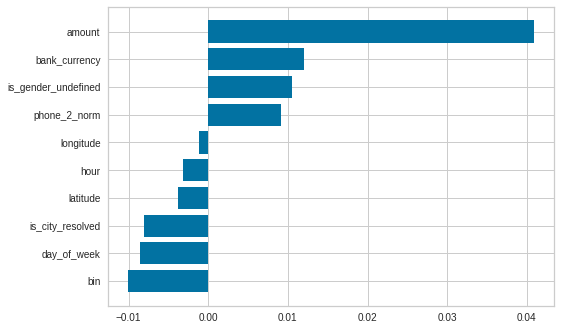

In [110]:
# If all features is numeric
visualizer.fit(X, y)        # Fit the data to the visualizer

In [111]:
# Create a list of the discrete features
discrete_cols = ['bank_currency', 'bin', 'day_of_week', 'hour', 'is_city_resolved', 'is_gender_undefined', 'phone_2_norm']

discrete_indexes = []
for cols in COL_FACTORS:
    if cols in discrete_cols:
        discrete_indexes.append(True)
    else:
        discrete_indexes.append(False)

In [112]:
discrete_indexes

[False, True, True, True, True, True, True, False, False, True]

In [113]:
# Instantiate the visualizer
visualizer = FeatureCorrelation(method='mutual_info-regression', labels=features, sort=True)

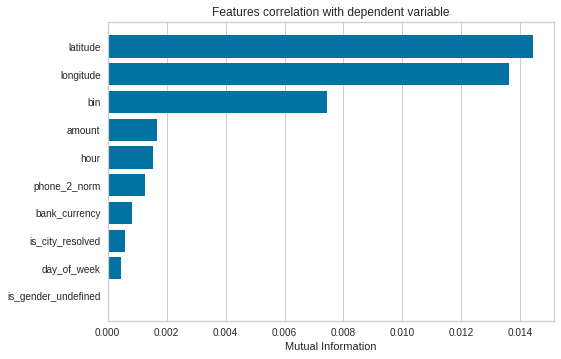

In [114]:
visualizer.fit(X, y, discrete_features=discrete_indexes, random_state=0)
visualizer.show()